# Simulated Annealing Lab - Report José LISE - DSTI S19

##  EXERCISE 1

The fitness function is the product of m and n defined by:   

m = 1+ $cos(0.04v)^2$  
n = exp(−$v^2$ /(20000))  

The function code is in the next cell. 


In [319]:
import math 

def fitnessFunc(x):
    m = 1 + math.cos(0.04 * x)**2
    n = math.exp(-x**2/20000.0)
    return m * n 


## EXERCISE 2

Display the fitness surface with 1000 points from x = -500 and x = 500. The code displaying the chart is in the next cell.    



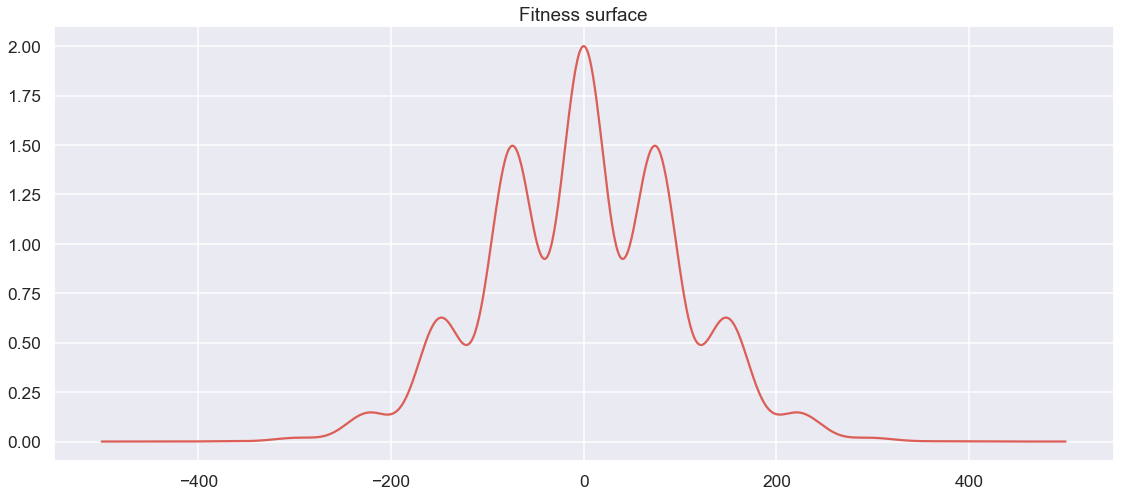

In [4]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt  # to plot
import matplotlib as mpl
import seaborn as sns
sns.set(context="talk", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.05)

FIGSIZE = (19, 8)  #: Figure size, in inches!
mpl.rcParams['figure.figsize'] = FIGSIZE

x = np.linspace(-500, 500, 1000)
y = np.array([fitnessFunc(i) for i in x])

plt.plot(x,y)
plt.title("Fitness surface")
plt.show()

## EXERCISE 3

The goal is to find the maximum of the fitness function. The initial algorithm is to find the the minimum. Therefore we have to change it to find the maximum. 
The algorithm code is in the next cells and below the code there is the chart of the trajectory of the annealing along the fitness surface. 

In [5]:
def annealing(random_start,
              cost_function,
              random_neighbour,
              acceptance,
              temperature,
              tzero=10.0,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
#    state = random_start()
    state = random_start
    cost = cost_function(state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(fraction,tzero)
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
 #       if acceptance_probability(cost, new_cost, T) < rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs


In [299]:
#interval = (-10, 10)
interval = (-200, 200)

def f(x):
    """ Function to minimize."""
    return x ** 2

def clip(x):
    """ Force x to be in the interval."""
    a, b = interval
    return max(min(x, b), a)

In [7]:
def random_start():
    """ Random point in the interval."""
    a, b = interval
    return a + (b - a) * rn.random_sample()

In [8]:
def cost_function(x):
    """ Cost of x = f(x)."""
    return f(x)

In [9]:
def random_neighbour(x, fraction=1):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x + delta)

In [320]:
def acceptance_probability(cost, new_cost, temperature):
    if new_cost > cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- ( cost - new_cost  ) / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p

In [11]:
def temperature(fraction, tzero=10.0):
    """ Example of temperature dicreasing as the process goes on."""
    return max(0.01, min(tzero, tzero - fraction))

In [17]:
annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=30, debug=True);

Step # 0/30 : T =    1, state = -4.46, cost = 19.9, new_state = -4.46, new_cost = 19.9 ...
Step # 1/30 : T = 0.967, state = -4.46, cost = 19.9, new_state = -4.46, new_cost = 19.9 ...
Step # 2/30 : T = 0.933, state = -4.46, cost = 19.9, new_state = -4.44, new_cost = 19.7 ...
Step # 3/30 : T =  0.9, state = -4.44, cost = 19.7, new_state = -4.49, new_cost = 20.2 ...
Step # 4/30 : T = 0.867, state = -4.49, cost = 20.2, new_state = -4.46, new_cost = 19.9 ...
Step # 5/30 : T = 0.833, state = -4.46, cost = 19.9, new_state = -4.5, new_cost = 20.2 ...
Step # 6/30 : T =  0.8, state = -4.5, cost = 20.2, new_state = -4.6, new_cost = 21.2 ...
Step # 7/30 : T = 0.767, state = -4.6, cost = 21.2, new_state = -4.43, new_cost = 19.6 ...
Step # 8/30 : T = 0.733, state = -4.43, cost = 19.6, new_state = -4.41, new_cost = 19.5 ...
Step # 9/30 : T =  0.7, state = -4.41, cost = 19.5, new_state = -4.39, new_cost = 19.3 ...
Step #10/30 : T = 0.667, state = -4.39, cost = 19.3, new_state = -4.35, new_cost = 18.9 

In [329]:
t0 = 10
state, c, states, costs = annealing(250, fitnessFunc, random_neighbour, acceptance_probability, temperature,tzero=t0, maxsteps=3000, debug=False)

state
c

0.5056609517756795

In [330]:
def annealing_fitness(costs,x,y,t):
    plt.figure()
    plt.suptitle(f"Evolution of fitness of the simulated annealing (T={t}) along fitness surface")
    plt.subplot(121)
    plt.plot(costs, 'b')
    plt.title("fitness")
    plt.subplot(122)
    plt.plot(x,y, 'r')
    plt.title("fitness surface")
    plt.show()

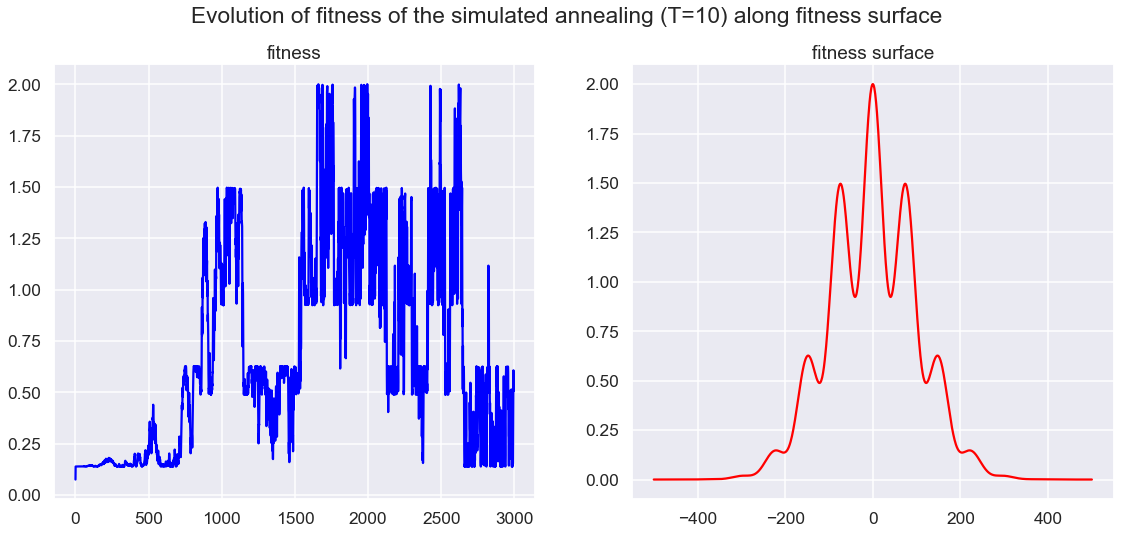

In [331]:
annealing_fitness(costs,x,y, 10)

In the next cell, we search for the temperature for which we have the peak reached 90% of the time. But we don't see any impact of the temperature increase. 


In [337]:
t0=10.0
f = np.empty([20])
interval = (-50, 50)

for i in range(20):
    state, f[i], states, costs = annealing(250, fitnessFunc, random_neighbour, acceptance_probability, temperature, tzero=t0, maxsteps=3000, debug=False)

print (f" % of nb of peak reached :  {np.sum(np.abs(f - 2.0) <= 1.0e-2)*5}") 
print (f" Average cost :  {np.average(f)}  - STD cost: {np.std(f)} - average + std: {np.average(f)+np.std(f)}") 
j=1
while (np.sum(np.abs(f - 2.0) <= 1.0e-2) < 18) and j<= 20:
    t0 = t0 + 1
    for i in range(20):
       state, f[i], states, costs = annealing(250, fitnessFunc, random_neighbour, acceptance_probability,temperature, tzero=t0, maxsteps=3000, debug=False)
    print (f"while - t0 = {t0} - % nb of peak reached : {np.sum(np.abs(f - 2.0) <= 1.0e-2)*5}")
    j += 1 


 % of nb of peak reached :  0
 Average cost :  1.3122794104624913  - STD cost: 0.3788060448924739 - average + std: 1.6910854553549652
while - t0 = 11.0 - % nb of peak reached : 0
while - t0 = 12.0 - % nb of peak reached : 20
while - t0 = 13.0 - % nb of peak reached : 5
while - t0 = 14.0 - % nb of peak reached : 0
while - t0 = 15.0 - % nb of peak reached : 5
while - t0 = 16.0 - % nb of peak reached : 15
while - t0 = 17.0 - % nb of peak reached : 0
while - t0 = 18.0 - % nb of peak reached : 10
while - t0 = 19.0 - % nb of peak reached : 15
while - t0 = 20.0 - % nb of peak reached : 15
while - t0 = 21.0 - % nb of peak reached : 0
while - t0 = 22.0 - % nb of peak reached : 0
while - t0 = 23.0 - % nb of peak reached : 5
while - t0 = 24.0 - % nb of peak reached : 0
while - t0 = 25.0 - % nb of peak reached : 5
while - t0 = 26.0 - % nb of peak reached : 0
while - t0 = 27.0 - % nb of peak reached : 0
while - t0 = 28.0 - % nb of peak reached : 5
while - t0 = 29.0 - % nb of peak reached : 5
while 

However we do see an impact of the search radius. If we set it to [-20, 20] we see an improvement. 


## EXERCISE 4 
Best fitness versus iteration number. is in the next cell. 


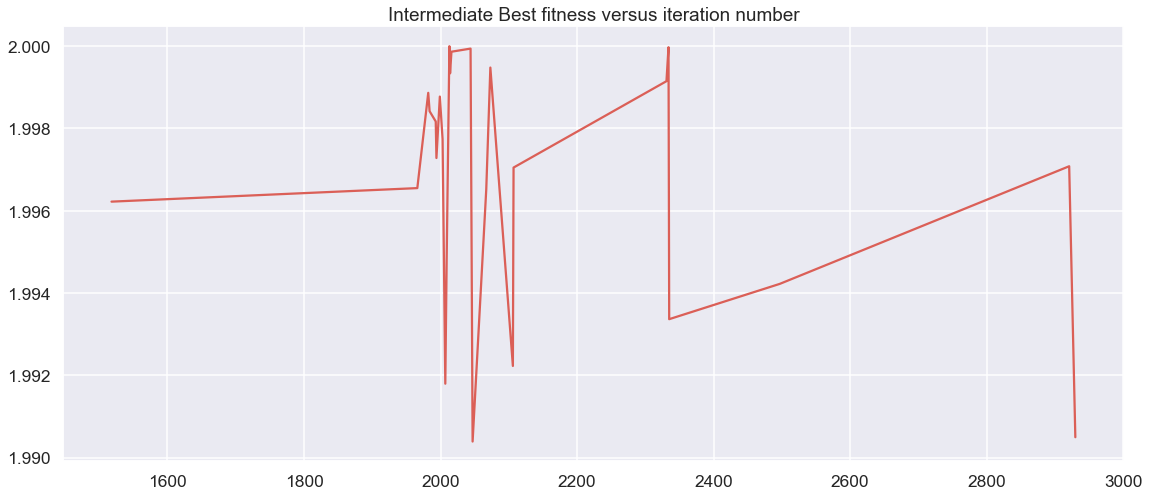

In [341]:
interval = (-200, 200)
state, cost, states, costs = annealing(250, fitnessFunc, random_neighbour, acceptance_probability, temperature, tzero=t0, maxsteps=3000, debug=False)
bfi = [costs.index(i) for i in costs if abs(i - 2.0) < 1.0e-2]
bf = [costs[i] for i in bfi]

plt.plot(bfi, bf)
plt.title("Intermediate Best fitness versus iteration number")
plt.show()